In [1]:
import requests

r_train = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")# 获取数据集
r_val=requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t")# 获取数据集

In [2]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

n_features=123

X_train, y_train = load_svmlight_file(BytesIO(r_train.content), n_features)# 读取实验数据
X_train = X_train.toarray()# 转换成arry

X_val, y_val = load_svmlight_file(BytesIO(r_val.content), n_features)# 读取实验数据
X_val = X_val.toarray()# 转换成arry

In [3]:
import numpy

n_train_samples, n_train_features = X_train.shape# 计算有多少个samples和feature
X_train = numpy.column_stack((X_train, numpy.ones((n_train_samples, 1))))# 再加上一列
y_train = y_train.reshape((-1, 1))# 将y转置，换成一列的
n_val_samples, n_val_features = X_val.shape# 计算有多少个samples和feature
X_val = numpy.column_stack((X_val, numpy.ones((n_val_samples, 1))))# 再加上一列
y_val = y_val.reshape((-1, 1))# 将y转置，换成一列的

for i in range(y_train.shape[0]):
    y_train[i][0]=(y_train[i][0]+1)/2

for i in range(y_val.shape[0]):
    y_val[i][0]=(y_val[i][0]+1)/2
    
# print(X_train)
# print(y_train)
# print(X_val)
# print(y_val)

In [16]:
learning_rate = 0.01
max_epoch = 1000
batch_size=1000

losses_train = []
losses_val = []

In [17]:
# 不同的初始化参数的方式# 产生的w为n_features+1行，1列的列向量
#w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution
# print(w)

In [18]:
# Sigmoid函数
def sigmoid(z):
    return 1/(1+numpy.exp(-z))

In [19]:
def sample(X, y, batch_size):
    random_row = numpy.random.randint(len(y) - batch_size)
    
    # get partial sample
    X_batch = X[random_row]
    y_batch = y[random_row]
    random_row += 1
    for i in range(batch_size - 1):
        X_batch = numpy.vstack((X_batch,X[random_row]))
        y_batch = numpy.vstack((y_batch,y[random_row]))
        random_row += 1
    
    return X_batch, y_batch

In [20]:
import random

#oringin random method
#batch=random.sample(range(0,n_train_samples),batch_size) 
# print("batch:",batch)
# gradient=numpy.zeros((n_features + 1, 1))

for epoch in range(max_epoch):
    X_batch, y_batch = sample(X_train, y_train, batch_size)# 取batch
    G=numpy.dot(X_batch.transpose(),(sigmoid(numpy.dot(X_batch,w))-y_batch))/batch_size
    w=w-learning_rate*G
    '''#oringinal method
    for i in batch:
        z_train=numpy.dot(X_train[i],w)
        diff=sigmoid(numpy.dot(X_train[i],w))-y_train[i]
        gradient+=diff*X_train[i].reshape(-1,1)
    w=w-learning_rate*gradient/batch_size
    # print("then_w:",w)
    '''
    
    # 计算测试集的loss
    z_predict = numpy.dot(X_val, w)
    loss_val=-(numpy.dot(y_val.transpose(),numpy.log(sigmoid(z_predict)))+numpy.dot((1-y_val.transpose()),numpy.log(1-sigmoid(z_predict))))/y_val.shape[0]
    losses_val.append(loss_val[0])
    
    # print("loss_val:\t",loss_val,"\ttype:",type(loss_val))
    
print(losses_val)

[array([5.23850348]), array([5.19650974]), array([5.15492502]), array([5.11223946]), array([5.07087625]), array([5.02872257]), array([4.98537357]), array([4.9430773]), array([4.90153728]), array([4.85955694]), array([4.81658737]), array([4.77470915]), array([4.7335098]), array([4.69229855]), array([4.65011089]), array([4.60878988]), array([4.56727715]), array([4.52581988]), array([4.48322036]), array([4.44137513]), array([4.40016113]), array([4.3588483]), array([4.31724227]), array([4.27551061]), array([4.23285274]), array([4.1929168]), array([4.15059017]), array([4.108288]), array([4.0666732]), array([4.02440636]), array([3.98236012]), array([3.94069493]), array([3.89975217]), array([3.85888017]), array([3.81822043]), array([3.77618287]), array([3.73608349]), array([3.69560234]), array([3.65462269]), array([3.61255776]), array([3.57283285]), array([3.53263205]), array([3.49124894]), array([3.45051564]), array([3.41123332]), array([3.37019632]), array([3.33112096]), array([3.29105656])

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

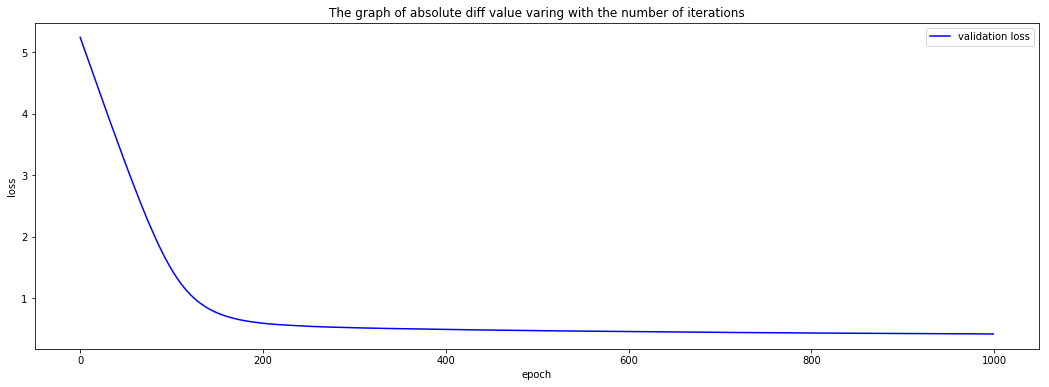

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")